In [61]:
# The code was removed by Watson Studio for sharing.

,Postal_Code,Neighborhood
0,94102,Hayes Valley/Tenderloin/North of Market
1,94103,South of Market
2,94107,Potrero Hill
3,94108,Chinatown
4,94109,Polk/Russian Hill (Nob Hill)


In [62]:
df_sfo_neigh['Postal_Code'] = df_sfo_neigh['Postal_Code'].astype('str')

In [63]:
df_sfo_neigh.dtypes

Postal_Code     object
Neighborhood    object
dtype: object

In [64]:
# The code was removed by Watson Studio for sharing.

In [65]:
df_sfo_rest.rename(columns={'business_postal_code':'Postal_Code'}, inplace=True)
df_sfo_rest.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,NaN,NaN,NaN,NaN,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN


In [66]:
df_check = df_sfo_rest

In [67]:
df_check['business_latitude'] = df_check['business_latitude'].fillna(df_check.groupby('Postal_Code')['business_latitude'].transform('mean'))
df_check['business_latitude'] = df_check['business_latitude'].fillna(df_check['business_latitude'].mean())

df_check['business_longitude'] = df_check['business_longitude'].fillna(df_check.groupby('Postal_Code')['business_longitude'].transform('mean'))
df_check['business_longitude'] = df_check['business_longitude'].fillna(df_check['business_longitude'].mean())

In [68]:
#df_sfo_rest['business_id'] = df_sfo_rest['business_id'].astype('str')
#df_sfo_rest['business_latitude'] = df_sfo_rest['business_latitude'].astype('str')
#df_sfo_rest['business_longitude'] = df_sfo_rest['business_longitude'].astype('str')
#df_sfo_rest['business_phone_number'] = df_sfo_rest['business_phone_number'].astype('str')
#df_sfo_rest['inspection_score'] = df_sfo_rest['inspection_score'].astype('str')

In [69]:
df_sfo_rest.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
Postal_Code               object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [70]:
df_sfo_neigh.dtypes

Postal_Code     object
Neighborhood    object
dtype: object

In [71]:
df_merged_sfo = pd.merge(df_check, df_sfo_neigh, on='Postal_Code', how='left')

In [72]:
df_merged_sfo.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.721166,-122.440148,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,Ingelside-Excelsior/Crocker-Amazon
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley/Tenderloin/North of Market
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,37.759559,-122.432392,NaN,NaN,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN,Castro/Noe Valley
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,37.775161,-122.411068,NaN,NaN,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN,South of Market
6,97830,CHARLES CHOCOLATES,2650 18th St,San Francisco,CA,94110,37.753023,-122.417862,NaN,1.415566e+10,97830_20181128,2018-11-28T00:00:00.000,NaN,New Construction,NaN,NaN,NaN,Inner Mission/Bernal Heights
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,37.788154,-122.397855,NaN,1.415046e+10,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,NaN,NaN,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,NaN,1.415554e+10,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Inner Mission/Bernal Heights


In [73]:
df_merged_sfo.shape

(53620, 18)

In [74]:
df_merged_sfo = df_merged_sfo.drop('business_location', 1)

In [75]:
df_merged_sfo = df_merged_sfo.drop('business_phone_number', 1)

In [76]:
df_merged_sfo.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.721166,-122.440148,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,Ingelside-Excelsior/Crocker-Amazon
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley/Tenderloin/North of Market
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,37.759559,-122.432392,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN,Castro/Noe Valley
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,37.775161,-122.411068,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN,South of Market
6,97830,CHARLES CHOCOLATES,2650 18th St,San Francisco,CA,94110,37.753023,-122.417862,97830_20181128,2018-11-28T00:00:00.000,NaN,New Construction,NaN,NaN,NaN,Inner Mission/Bernal Heights
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,37.788154,-122.397855,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Inner Mission/Bernal Heights


In [77]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

# All requested packages already installed.



In [78]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="sfo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of SFO using latitude and longitude values
map_sfo = folium.Map(location=[latitude, longitude], zoom_start=12)
map_sfo

In [79]:
df_merged_sfo.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
2,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,37.721166,-122.440148,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN,Ingelside-Excelsior/Crocker-Amazon
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley/Tenderloin/North of Market
4,96024,Fig & Thistle Market,691 14th St,San Francisco,CA,94114,37.759559,-122.432392,96024_20181108,2018-11-08T00:00:00.000,NaN,New Ownership - Followup,NaN,NaN,NaN,Castro/Noe Valley
5,97503,Moscone South Main Kitchen,747 Howard St,San Francisco,CA,94103,37.775161,-122.411068,97503_20180911,2018-09-11T00:00:00.000,NaN,New Ownership,NaN,NaN,NaN,South of Market
6,97830,CHARLES CHOCOLATES,2650 18th St,San Francisco,CA,94110,37.753023,-122.417862,97830_20181128,2018-11-28T00:00:00.000,NaN,New Construction,NaN,NaN,NaN,Inner Mission/Bernal Heights
7,97748,FISTFUL OF TACOS,201 Harrison St Unit C-2,San Francisco,CA,94105,37.788154,-122.397855,97748_20180821,2018-08-21T00:00:00.000,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Inner Mission/Bernal Heights


In [80]:
import numpy as np

In [81]:
sum(pd.isnull(df_merged_sfo['inspection_score']))

14883

In [82]:
df_backup = df_merged_sfo

In [83]:
df_merged_sfo_clean = df_merged_sfo.dropna(subset = ['inspection_score'])

In [84]:
df_merged_sfo_clean.shape

(38737, 16)

In [85]:
df_merged_sfo_clean = df_merged_sfo.dropna(subset = ['risk_category'])

In [86]:
df_merged_sfo_clean.shape

(40250, 16)

In [87]:
df_merged_sfo_clean.head(10)

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
0,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.782138,-122.462649,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,Inner Richmond
1,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,37.792761,-122.406466,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,Chinatown
3,85987,Tselogs,552 Jones St,San Francisco,CA,94102,37.783009,-122.414554,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk,Hayes Valley/Tenderloin/North of Market
8,77901,"The Estate Kitchen, LLC",799 Bryant St,San Francisco,CA,94107,37.774317,-122.396536,77901_20180416,2018-04-16T00:00:00.000,86.0,Routine - Unscheduled,77901_20180416_103139,Improper food storage,Low Risk,Potrero Hill
9,87782,Beloved Cafe,3338 24th St,San Francisco,CA,94110,37.753023,-122.417862,87782_20180502,2018-05-02T00:00:00.000,96.0,Routine - Unscheduled,87782_20180502_103161,Low risk vermin infestation,Low Risk,Inner Mission/Bernal Heights
18,74712,Kasa Indian Eatery,1356 Polk St,San Francisco,CA,94109,37.789368,-122.419673,74712_20180820,2018-08-20T00:00:00.000,96.0,Routine - Unscheduled,74712_20180820_103129,Insufficient hot water or running water,Moderate Risk,Polk/Russian Hill (Nob Hill)
21,99397,RAMEN COCO LLC,3319 MISSION ST,San Francisco,CA,94110,37.753023,-122.417862,99397_20190318,2019-03-18T00:00:00.000,NaN,New Ownership,99397_20190318_103133,Foods not protected from contamination,Moderate Risk,Inner Mission/Bernal Heights
23,77162,Ramen Yamadaya,1728 Buchanan St,San Francisco,CA,94115,37.786216,-122.435046,77162_20181210,2018-12-10T00:00:00.000,79.0,Routine - Unscheduled,77162_20181210_103103,High risk food holding temperature,High Risk,Western Addition/Japantown
26,69850,"Kabob Trolley, LLC",298 King St,San Francisco,CA,NaN,37.764268,-122.402965,69850_20180824,2018-08-24T00:00:00.000,72.0,Routine - Unscheduled,69850_20180824_103157,Food safety certificate or food handler card n...,Low Risk,NaN
32,71999,Shabu Club,951 Clement St,San Francisco,CA,94118,37.782138,-122.462649,71999_20171127,2017-11-27T00:00:00.000,NaN,Foodborne Illness Investigation,71999_20171127_103109,Unclean or unsanitary food contact surfaces,High Risk,Inner Richmond


In [88]:
df_merged_sfo_clean = df_merged_sfo_clean.dropna(subset = ['inspection_score'])

In [89]:
df_merged_sfo_clean.shape

(36736, 16)

In [90]:
df_merged_sfo_clean = df_merged_sfo_clean.dropna(subset = ['Neighborhood'])

In [91]:
df_merged_sfo_clean.shape

(32414, 16)

In [92]:
df_merged_sfo_high = df_merged_sfo_clean[df_merged_sfo_clean['risk_category'] == 'High Risk']

In [93]:
df_merged_sfo_high.shape

(4573, 16)

In [94]:
x1 = df_merged_sfo_high['business_latitude']
y1 = df_merged_sfo_high['business_longitude']

len(y1)

4573

In [95]:
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

arr = np.column_stack((x1, y1))
arr

array([[  37.78621582, -122.43504553],
       [  37.78936849, -122.41967305],
       [  37.74341403, -122.48638621],
       ...,
       [  37.73537166, -122.39332974],
       [  37.77516141, -122.41106757],
       [  37.75302305, -122.41786185]])

In [96]:
df_backup1 = df_merged_sfo_high

In [97]:
df_backup1.head()

,business_id,business_name,business_address,business_city,business_state,Postal_Code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhood
23,77162,Ramen Yamadaya,1728 Buchanan St,San Francisco,CA,94115,37.786216,-122.435046,77162_20181210,2018-12-10T00:00:00.000,79.0,Routine - Unscheduled,77162_20181210_103103,High risk food holding temperature,High Risk,Western Addition/Japantown
87,94394,Kokio Republic,428 11th St,San Francisco,CA,94109,37.789368,-122.419673,94394_20190111,2019-01-11T00:00:00.000,84.0,Routine - Unscheduled,94394_20190111_103105,Improper cooling methods,High Risk,Polk/Russian Hill (Nob Hill)
91,97065,CHALOS,2240 Taraval St,San Francisco,CA,94116,37.743414,-122.486386,97065_20190712,2019-07-12T00:00:00.000,93.0,Routine - Unscheduled,97065_20190712_103114,High risk vermin infestation,High Risk,Parkside/Forest Hill
184,86885,Franklin Market,2836 Franklin St,San Francisco,CA,94123,37.799409,-122.434016,86885_20190515,2019-05-15T00:00:00.000,91.0,Routine - Unscheduled,86885_20190515_103103,High risk food holding temperature,High Risk,Marina
187,90939,Jiangnan Cuisine,3420 Balboa St,San Francisco,CA,94121,37.779567,-122.488258,90939_20190819,2019-08-19T00:00:00.000,80.0,Routine - Unscheduled,90939_20190819_103108,Contaminated or adulterated food,High Risk,Outer Richmond


In [98]:
from folium.plugins import FastMarkerCluster

In [99]:
import os

In [100]:
%%time


m = folium.Map(
    location=[np.mean(x1), np.mean(y1)],
    tiles='Cartodb Positron',
    zoom_start=5
)

FastMarkerCluster(data=list(zip(x1, y1))).add_to(m)

folium.LayerControl().add_to(m)

CPU times: user 32 ms, sys: 8 ms, total: 40 ms
Wall time: 36.5 ms


In [101]:
m

In [102]:
#Kmeans
from sklearn.cluster import KMeans
x= df_merged_sfo_high[['business_latitude','business_longitude']]
x.head()

,business_latitude,business_longitude
23,37.786216,-122.435046
87,37.789368,-122.419673
91,37.743414,-122.486386
184,37.799409,-122.434016
187,37.779567,-122.488258


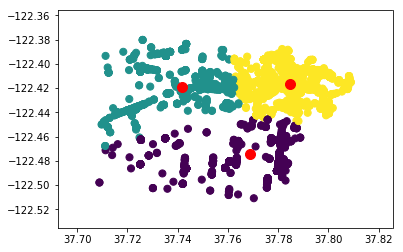

In [103]:
km = KMeans(n_clusters = 3).fit(x)
y_kmeans=km.predict(x)
plt.scatter(x['business_latitude'], x['business_longitude'], c=y_kmeans, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1);
plt.show()

In [104]:
centers

array([[  37.76866563, -122.47460594],
       [  37.74180926, -122.41932237],
       [  37.7845893 , -122.41620928]])

In [119]:
# group by neighborhood
high_risk_grouped = df_backup1.groupby('Neighborhood').count()
high_risk_grouped = pd.DataFrame(high_risk_grouped,columns=['risk_category']) # remove unneeded columns
high_risk_grouped.reset_index(inplace=True) # default index, otherwise groupby column becomes index
high_risk_grouped.rename(columns={'risk_category':'Count'}, inplace=True)
high_risk_grouped.sort_values(by='Count', inplace=True, ascending=False)
#print(sf)
high_risk_grouped.head()

,Neighborhood,Count
6,Inner Mission/Bernal Heights,586
15,South of Market,539
7,Inner Richmond,378
13,Polk/Russian Hill (Nob Hill),346
4,Hayes Valley/Tenderloin/North of Market,334


In [137]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_3 = client_d081222609ac4c16af0027c7511688a8.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-pvz1jeax4yswat', Key='SF Find Neighborhoods.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_3, "__iter__"): streaming_body_3.__iter__ = types.MethodType( __iter__, streaming_body_3 ) 



In [138]:
sfgd = open('SF_neigh.geojson', 'wb')
sfgd.write(streaming_body_3.read())

293640

In [ ]:
import 

In [133]:
# Create map
sf_map = folium.Map(
 location=[latitude,longitude],
 zoom_start=12)

In [134]:
# Use json file TEST based on class
sf_map.choropleth(
 geo_data=streaming_body_2,
 data=high_risk_grouped,
 columns=['Neighborhood','Count'],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='SF')
# display the map
sf_map

ValueError: Unhandled object <ibm_botocore.response.StreamingBody object at 0x7f5677dabac8>.